## 라이브러리/데이터셋 로드

In [9]:
import shap
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

california = fetch_california_housing()
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

100%|===================| 4114/4128 [04:00<00:00]        

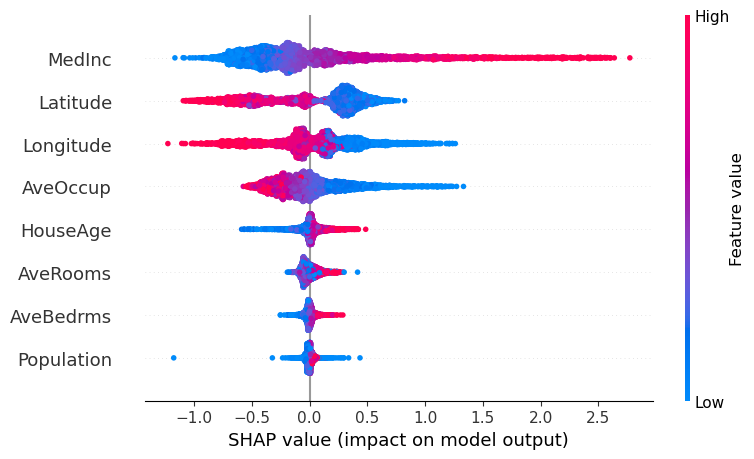

In [4]:
# RandomForestRegressor 모델 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# SHAP 값 계산
explainer = shap.TreeExplainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)

# SHAP 요약 플롯
shap.summary_plot(shap_values, X_test, feature_names=california.feature_names)
